<div><img style="float: right; width: 120px; vertical-align:middle" src="https://www.upm.es/sfs/Rectorado/Gabinete%20del%20Rector/Logos/EU_Informatica/ETSI%20SIST_INFORM_COLOR.png" alt="ETSISI logo" />


# Infrajuste y sobreajuste<a id="top"></a>

<i><small>Autor: Alberto Díaz Álvarez<br>Última actualización: 2023-03-05</small></i></div>
                                                  

***

## Introducción

El infraajuste y el sobreajuste son dos elementos críticos a dominar en aprendizaje automático.

En aprendizaje profundo, **más**, sobre todo el segundo (sobreajuste o _overfitting_), ya que los modelos son en general mucho más complejos que los de Aprendizaje Automático tradicional.

## Objetivos

Vamos a explorar ambos conceptos con dos ejemplos simples pero ilustrativos de los problemas de infrajuste (_underfitting_ o _bias_) y sobreajuste (_overfitting_ o _variance_) en problemas de regersión y clasificación.

## Bibliotecas y configuración

A continuación importaremos las bibliotecas que se utilizarán a lo largo del _notebook_.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow as tf

Configuraremos también algunos parámetros para adecuar la presentación gráfica.

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams.update({'figure.figsize': (20, 6),'figure.dpi': 64})

Y por último establecemos la semilla de números aleatorios de numpy para intentar hacer el experimento lo más reproducible posible.

In [3]:
np.random.seed(42)

***

## Regresión

Los problemas de _underfitting_ y _overfitting_ son muy comunes en la construcción de modelos de regresión.

El _underfitting_ ocurre cuando el modelo no es lo suficientemente complejo como para capturar las relaciones entre las variables de entrada y salida, lo que se traduce en una baja precisión en la predicción de los valores de salida, tanto en los datos de entrenamiento como en los de prueba.

Por otro lado, el _overfitting_ ocurre cuando el modelo es demasiado complejo y se ajusta demasiado a los datos de entrenamiento, lo que se traduce en una alta precisión en los datos de entrenamiento pero una baja precisión en los datos de prueba. Esto se debe a que el modelo está capturando el ruido y las relaciones espurias presentes en los datos de entrenamiento en lugar de las verdaderas relaciones subyacentes.

Para evitar estos problemas, es necesario encontrar un equilibrio entre la complejidad del modelo y su capacidad para generalizar a datos nuevos y no vistos.

El problema sobre el que trabajaremos es el de intentar aproximar unos valores aleatorios extraídos de una función seno (aunque la idea es que en los problemas no sabemos de dónde salen esos valores y ahí está la gracia de usar modelos).

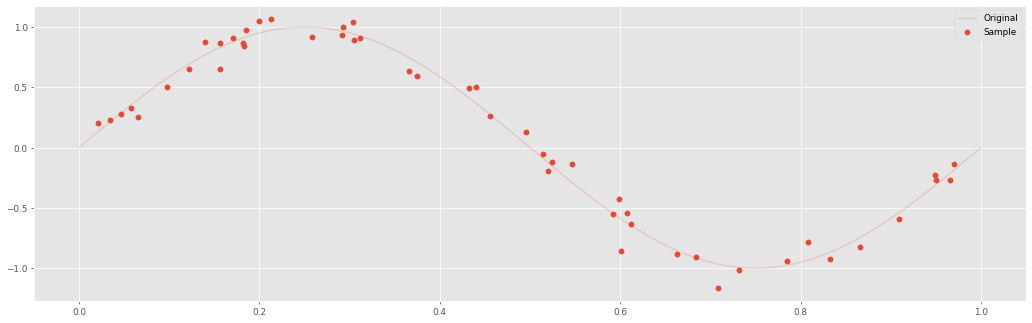

In [4]:
n_samples = 50

f = lambda x: np.sin(2 * np.pi * x)
true_x = np.linspace(0, 1, 100)
x = np.sort(np.random.rand(n_samples))
y = f(x) + np.random.randn(n_samples) * 0.1

plt.scatter(x, y, label='Sample')
plt.plot(true_x, f(true_x), label='Original', alpha=0.2)
plt.legend();

### Modelo con infrajuste

Comenzaremos con un modelo tan pequeño que no sea capaz de capturar todo el detalle de los ejemplos y que, por tanto, no sean capaz de ajustarse bien a los valores:

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, activation='relu', input_dim=1),
    tf.keras.layers.Dense(1, activation='tanh')
])
model.compile(loss="mae", optimizer="adam", metrics = ['accuracy'])
model.summary()
history = model.fit(x, y, epochs=1000, validation_split=0.1, verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 4         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


Veamos cómo ha ido el entrenamiento

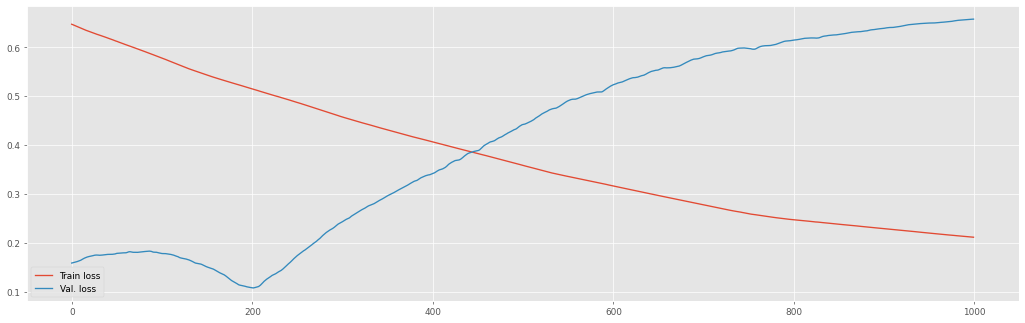

In [6]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val. loss')
plt.legend();

Se ve claramente que el error de entrenamiento no desciende lo suficiente, sino que se estanca en un valor bastante alto. Veamos qué modelo ha aprendido a aproximar:

4/4 [==============================] - 0s 1ms/step


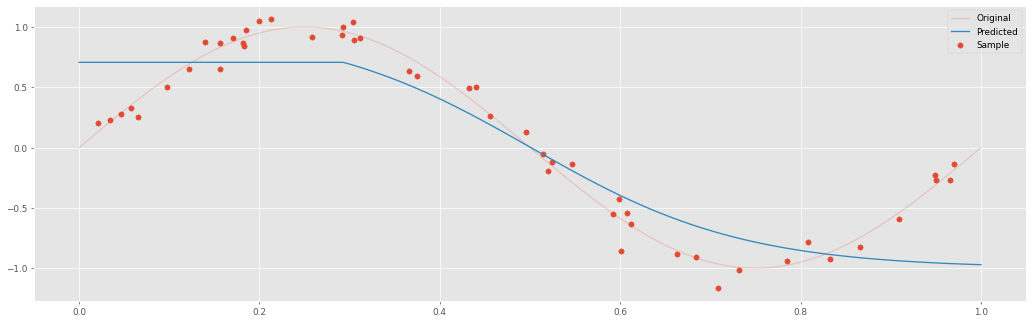

In [7]:
plt.scatter(x, y, label='Sample')
plt.plot(true_x, f(true_x), label='Original', alpha=0.2)
plt.plot(true_x, model.predict(true_x), label='Predicted')
plt.legend();

En efecto, lo ha intentado, pero si no puede es que no puede.

### Modelo con sobreajuste

Ahora iremos al extremo contrario. ¿Qué pasa cuando nuestro modelo es extremadamente grande? Pues que se aprende el conjunto de entrenamiento tanto que no es capaz de generalizar, y cuando le vienen ejemplos nuevos falla al clasificarlos. Entrenemos un modelo grande:

In [10]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4096, activation='relu', input_dim=1),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1, activation='tanh')
])
model.compile(loss="mae", optimizer="adam")
model.summary()

history = model.fit(x, y, epochs=1000, validation_split=0.1, verbose=0)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 4096)              8192      
                                                                 
 dense_11 (Dense)            (None, 4096)              16781312  
                                                                 
 dense_12 (Dense)            (None, 4096)              16781312  
                                                                 
 dense_13 (Dense)            (None, 1)                 4097      
                                                                 
Total params: 33,574,913
Trainable params: 33,574,913
Non-trainable params: 0
_________________________________________________________________


Veamos cómo ha ido el entrenamiento:

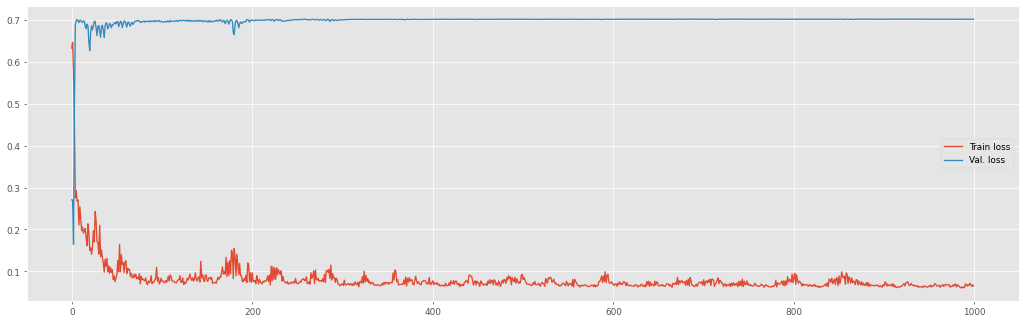

In [11]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val. loss')
plt.legend();

Bueno, parece que ha aprendido bastante, pero el error de validación se ha disparado. Esto nos está mostrando que sí, que se ha aprendido el conjunto de entrenamiento muy bien, pero que cuando hay valores nuevos el modelo no tiene ni idea dónde encajarlos.

Veamos qué forma tiene la función modelada por nuestra red:

4/4 [==============================] - 0s 10ms/step


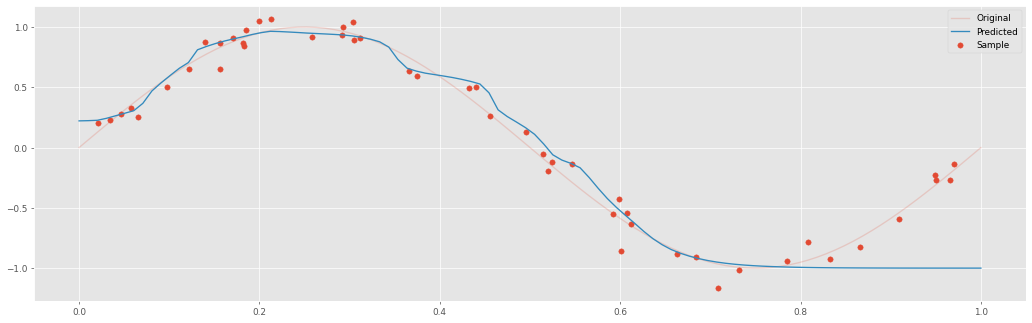

In [12]:
plt.scatter(x, y, label='Sample')
plt.plot(true_x, f(true_x), label='Original', alpha=0.2)
plt.plot(true_x, model.predict(true_x), label='Predicted')
plt.legend();

Bueno, ha aprendido lo que ha podido, pero es un modelo demasiado grande que no es capaz de generalizar lo suficiente.

Un buen ejercicio para hacer ahora sería el intentar obtener un modelo que aproxime esta función con la mayor fidelidad posible a partir de sus valores de ejemplo. La verdad es que, aunque ajustar un modelo del cual conocemos la función origen es muy poco creíble, el ejercicio es más para jugar con Keras.

## Clasificación

En problemas de clasificación, el _underfitting_ y el _overfitting_ son problemas similares a los que se presentan en la regresión: o se quedan cortos para capturar las relaciones entre entrada y salida, o se sobrespecializan y no son capaces de generalizar.

Para evitarlos el remedio es el mismo: intentar seleccionar un modelo con la complejidad adecuada mediante la el estudio de las tendencias del _loss_ en entrenamiento y test para evaluar su capacidad de generalización.

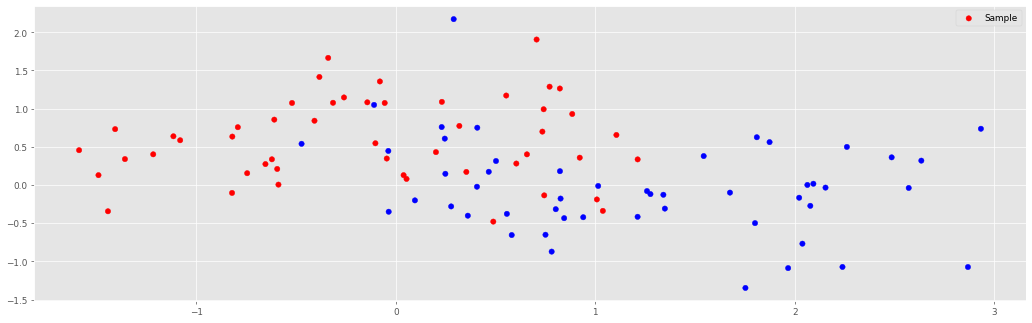

In [13]:
colors = np.array(['red', 'blue'])
n_samples = 100

X, y = datasets.make_moons(n_samples=n_samples, noise=.5)

plt.scatter(X[:,0], X[:,1], label='Sample', color=colors[y])
plt.legend();

### Modelo con infrajuste

Vamos a crear un modelo simple para intentar clasificar estos dos conjuntos de ejemplo.

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, activation='relu', input_dim=2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss="binary_crossentropy", optimizer="adam", metrics = ['accuracy'])
model.summary()

history = model.fit(X, y, epochs=1000, validation_split=0.1, verbose=0)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 2)                 6         
                                                                 
 dense_15 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


Tras el entrenamiento, veamos la tendencia de los _loss_ de entrenamiento y test:

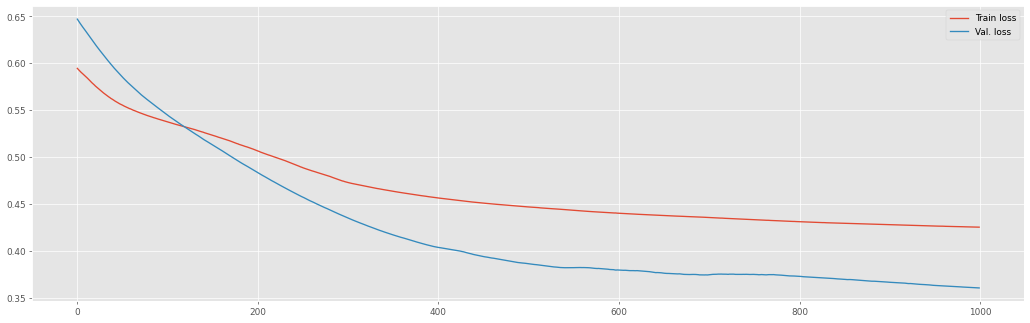

In [15]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val. loss')
plt.legend();

Vaya, un caso similar al anterior. El entrenamiento se estanca en un error relativamente alto. Veamos cuales son las regiones que ha determinado el clasificador:

7813/7813 [==============================] - 5s 583us/step


C:\Users\andro\AppData\Local\Temp\ipykernel_15288\470146064.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(gridx1, gridx2, probs.reshape(500, 500))


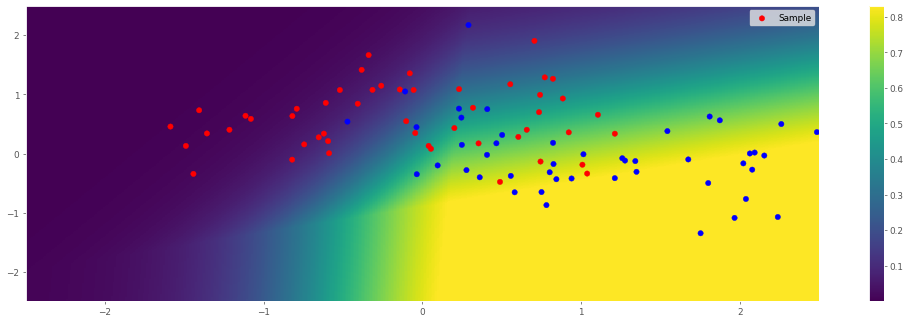

In [16]:
gridx1, gridx2 = np.meshgrid(np.linspace(-2.5, 2.5, 500), np.linspace(-2.5, 2.5, 500))
grid = np.c_[gridx1.flatten(), gridx2.flatten()]
probs = model.predict(grid)

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.pcolor(gridx1, gridx2, probs.reshape(500, 500))
plt.colorbar()
plt.scatter(X[:,0], X[:,1], label='Sample', color=colors[y])
plt.legend();

Prácticamente una línea recta que separa ambos conjuntos, cometiendo bastante error.

### Modelo con sobreajuste

Ahora probaremos justo lo contrario. Vamos a crear un modelo que sea tan grande que acabe aprendiéndose prácticamente todos los ejemplos de memoria:

In [17]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4096, activation='relu', input_dim=2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss="binary_crossentropy", optimizer="adam")
model.summary()

history = model.fit(X, y, epochs=1000, validation_split=0.1, verbose=0)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 4096)              12288     
                                                                 
 dense_17 (Dense)            (None, 4096)              16781312  
                                                                 
 dense_18 (Dense)            (None, 4096)              16781312  
                                                                 
 dense_19 (Dense)            (None, 1)                 4097      
                                                                 
Total params: 33,579,009
Trainable params: 33,579,009
Non-trainable params: 0
_________________________________________________________________


Veamos cómo ha ido la evolución del enrenamiento.

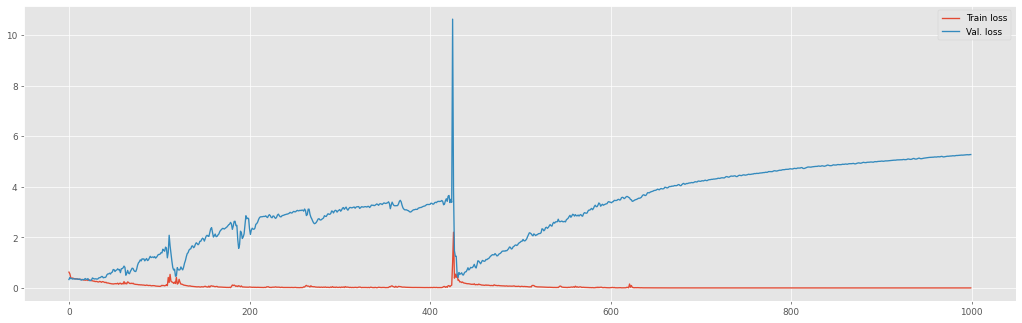

In [18]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val. loss')
plt.legend();

Podemos observar el mismo problema que con la regresión. El modelo se ajusta muy bien al conjunto de entrenamiento pero fatal al de test. Veamos las regiones que delimita en el espacio para discernir entre conjuntos:

7813/7813 [==============================] - 100s 13ms/step


C:\Users\andro\AppData\Local\Temp\ipykernel_15288\2622146761.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(gridx1, gridx2, probs.reshape(500, 500))


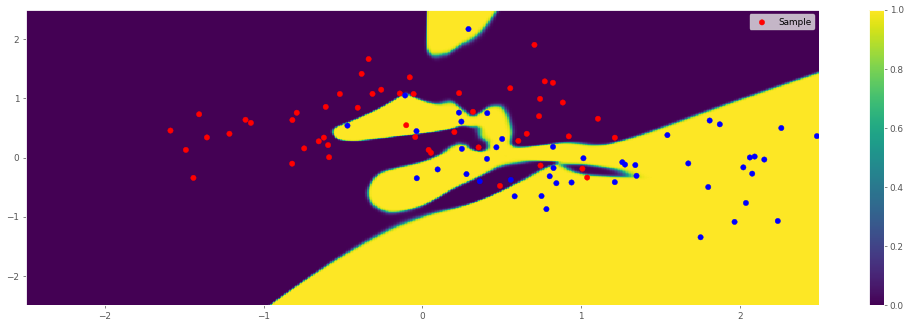

In [19]:
probs = model.predict(grid)

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.pcolor(gridx1, gridx2, probs.reshape(500, 500))
plt.colorbar()
plt.scatter(X[:,0], X[:,1], label='Sample', color=colors[y])
plt.legend();

Podemos observar que está muy especializado para intentar clasificar correctamente los ejemplos.

Como ejercicio, también staría muy bien jugar con diferentes arquitecturas para intentar llegar a una clasificación correcta. Así, además de coger más intuición en el entrenamiento de modelos, nos viene bien para entender mejor el funcionamiento de `keras`.

## Conclusiones

En conclusión, hemos realizado dos ejemplos que ilustran los problemas de _underfitting_ y _overfitting_ en problemas de regresión y la clasificación, y cómo estos problemas afectan la capacidad predictiva de los modelos.

El _underfitting_ resulta en una baja precisión en la predicción de los datos de entrenamiento y prueba, mientras que el _overfitting_ resulta en una alta precisión en los datos de entrenamiento pero una baja precisión en los datos de prueba. Para evitar estos problemas, es importante encontrar un equilibrio entre la complejidad del modelo y su capacidad para generalizar a datos nuevos y no vistos.

La selección adecuada de características, la validación cruzada, el ajuste de hiperparámetros y la regularización son técnicas útiles para evitar el _overfitting_ y el _underfitting_ y mejorar la capacidad predictiva de los modelos. Estos conceptos los veremos más adelante.

***

<div><img style="float: right; width: 120px; vertical-align:top" src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc-sa.png" alt="Creative Commons by-nc-sa logo" />

[Volver al inicio](#top)

</div>